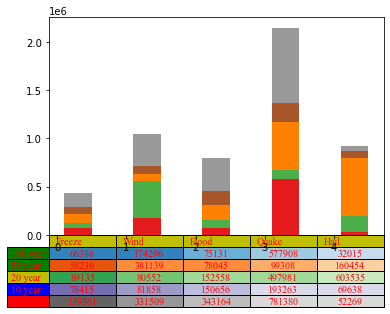

In [45]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

data = [[66386, 174296, 75131, 577908, 32015],
        [58230, 381139, 78045, 99308, 160454],
        [89135, 80552, 152558, 497981, 603535],
        [78415, 81858, 150656, 193263, 69638],
        [139361, 331509, 343164, 781380, 52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')  # 表列名
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]  # 表行名

bar_width = 0.4
n_rows = len(data)
index = np.arange(len(columns)) + 0.3
colors = plt.cm.Set1(np.linspace(0, 1, len(rows)))  # Set1的区间为[0,1],取将区间分为5等分处点的颜色
y_offset = np.zeros(len(columns))  # Initialize the vertical-offset for the stacked bar chart.
for row in range(n_rows):
    ax.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]

colors_1 = plt.cm.tab20c(np.linspace(0, 1, 25))  # array
colors_list = list()
for each in range(5):
    colors_list.append(colors_1[each * 5:(each + 1) * 5])
'''
loc:表格位置(bottom,top,right,left)

cellText:表格数据
cellColours:表格每个cell的颜色
cellLoc:表格数据对齐方式(right,left,center)

rowLabels:行标签
rowColours:行标签每个cell的颜色
rowLoc:行标签数据对齐方式(right,left,center)

colLabels:列标签
colColours:列标签每个cell的颜色
colLoc:列标签数据对齐方式(right,left,center)
'''
the_table = ax.table(cellText=data,
                     loc='bottom',
                     cellLoc='center',
                     cellColours=colors_list,
                     rowLabels=rows,
                     rowColours=['g', 'g', 'y', 'b', 'r'],
                     rowLoc='left',
                     colLabels=columns,
                     colColours=['y', 'y', 'y', 'y', 'y'],
                     colLoc='left')

# the_table.set_fontsize(15)  # 所有表格字体大小设置(包括index,columns)

all_cell = the_table.get_celld()
for i in all_cell.keys():
    all_cell[i].set_text_props(fontfamily='Times New Roman',
                               color='red',
                               fontsize=10)  # 每个小cell字体大小设置(包括index,columns)

plt.show()